In [1]:
# Importation des bibliothèques essentielles
import pandas as pd 
import numpy as np 

# Bibliothèques pour la visualisation des données
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns 


### Importation des données à partir d'un fichier CSV

In [2]:
# Chemin du dataset
dataset_path = r'C:\M2DS\S3\RS\Project\twitter_human_bots_dataset.csv'

# Chargement du dataset dans un DataFrame pandas
raw_df = pd.read_csv(dataset_path)

# Aperçu des premières lignes du dataset
raw_df.head()


,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [3]:
# Affichage des informations générales sur le dataset
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  object 
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30181 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37434 non-null  object 
 12  profile_background_image_url  32939 non-null  object 
 13  p

In [4]:
# Compter le nombre d'entrées pour chaque type de compte (bot ou humain)
account_counts = raw_df['account_type'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
account_counts.columns = ['account_type', 'total']

# Afficher le résultat
account_counts


,account_type,total
0,human,25013
1,bot,12425


C:\Users\BILAL\AppData\Local\Temp\ipykernel_6908\2754254382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=counts, palette="Blues_d")


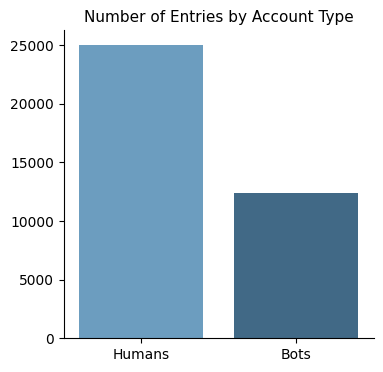

In [5]:
# Extraire le nombre d'humains et de bots à partir des données triées
num_humans = account_counts.loc[account_counts['account_type'] == 'human', 'total'].values[0]
num_bots = account_counts.loc[account_counts['account_type'] == 'bot', 'total'].values[0]

# Préparer les données pour le graphique
types = ['Humans', 'Bots']
counts = [num_humans, num_bots]

# Création du graphique en barres
plt.figure(figsize=(4, 4))
sns.barplot(x=types, y=counts, palette="Blues_d")
plt.title("Number of Entries by Account Type", fontsize=11)

# Améliorer l'esthétique
sns.despine()
plt.show()


In [6]:
# Compter les comptes vérifiés et non vérifiés par type de compte
verified_counts = raw_df[raw_df['verified'] == True].groupby('account_type').size().reset_index(name='ver_true')
not_verified_counts = raw_df[raw_df['verified'] == False].groupby('account_type').size().reset_index(name='ver_false')

# Combiner les deux résultats en un seul DataFrame
ver_status_by_type = pd.merge(verified_counts, not_verified_counts, on='account_type')

# Afficher le résultat
ver_status_by_type


,account_type,ver_true,ver_false
0,bot,316,12109
1,human,7235,17778


C:\Users\BILAL\AppData\Local\Temp\ipykernel_6908\2053040597.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=human_counts, palette="Greens_d")
C:\Users\BILAL\AppData\Local\Temp\ipykernel_6908\2053040597.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types, y=bot_counts, palette="Reds_d")


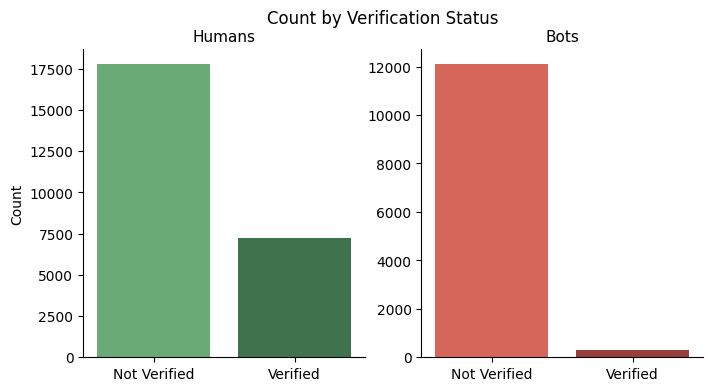

In [7]:
# Extraire les données des comptes vérifiés et non vérifiés
bots_verified = ver_status_by_type.loc[ver_status_by_type['account_type'] == 'bot', 'ver_true'].values[0]
bots_not_verified = ver_status_by_type.loc[ver_status_by_type['account_type'] == 'bot', 'ver_false'].values[0]
humans_verified = ver_status_by_type.loc[ver_status_by_type['account_type'] == 'human', 'ver_true'].values[0]
humans_not_verified = ver_status_by_type.loc[ver_status_by_type['account_type'] == 'human', 'ver_false'].values[0]

# Préparer les données pour les graphiques
types = ['Not Verified', 'Verified']
bot_counts = [bots_not_verified, bots_verified]
human_counts = [humans_not_verified, humans_verified]

# Création du graphique
plt.figure(figsize=(8, 4), dpi=100)
plt.suptitle("Count by Verification Status", fontsize=12)

# Sous-graphe pour les humains
plt.subplot(1, 2, 1)
sns.barplot(x=types, y=human_counts, palette="Greens_d")
plt.title("Humans", fontsize=11)
plt.ylabel("Count", fontsize=10)
sns.despine()

# Sous-graphe pour les bots
plt.subplot(1, 2, 2)
sns.barplot(x=types, y=bot_counts, palette="Reds_d")
plt.title("Bots", fontsize=11)
sns.despine()

# Afficher le graphique
plt.show()


In [8]:
# Supprimer la colonne d'index supplémentaire
raw_df.drop(columns=['Unnamed: 0'], inplace=True)

# Conversion des données en valeurs binaires pour les classifications (bots et valeurs booléennes)
raw_df['bot'] = raw_df['account_type'].apply(lambda x: 1 if x == 'bot' else 0)
raw_df['default_profile'] = raw_df['default_profile'].astype(int)
raw_df['default_profile_image'] = raw_df['default_profile_image'].astype(int)
raw_df['geo_enabled'] = raw_df['geo_enabled'].astype(int)
raw_df['verified'] = raw_df['verified'].astype(int)

# Conversion de la colonne 'created_at' en format datetime
raw_df['created_at'] = pd.to_datetime(raw_df['created_at'])

# Extraire l'heure de création du compte (pour une analyse plus approfondie)
raw_df['hour_created'] = raw_df['created_at'].dt.hour


In [9]:
# Sélection des colonnes pertinentes pour l'analyse et création du DataFrame utilisable
df = raw_df[['bot', 'screen_name', 'created_at', 'hour_created', 'verified', 'location', 'geo_enabled', 'lang', 'default_profile', 
             'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 'statuses_count',
             'average_tweets_per_day', 'account_age_days']]

# Supprimer le DataFrame original pour libérer de la mémoire
del raw_df


In [10]:
# Afficher les premières lignes du DataFrame df pour vérifier la structure des données
df.head()


,bot,screen_name,created_at,hour_created,verified,location,geo_enabled,lang,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
0,1,best_in_dumbest,2016-10-15 21:32:11,21,0,unknown,0,en,0,0,4,1589,4,11041,7.870,1403
1,0,CJRubinPhoto,2016-11-09 05:01:30,5,0,Estados Unidos,0,en,0,0,536,860,880,252,0.183,1379
2,0,SVGEGENT,2017-06-17 05:34:27,5,0,"Los Angeles, CA",1,en,0,0,3307,172,594,1001,0.864,1159
3,0,TinkerVHELPK5,2016-07-21 13:32:25,13,0,"Birmingham, AL",1,en,1,0,8433,517,633,1324,0.889,1489
4,0,JoleonLescott,2012-01-15 16:32:35,16,1,"England, United Kingdom",1,en,0,0,88,753678,116,4202,1.339,3138


In [11]:
# Afficher les informations générales sur le DataFrame df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   bot                     37438 non-null  int64         
 1   screen_name             37438 non-null  object        
 2   created_at              37438 non-null  datetime64[ns]
 3   hour_created            37438 non-null  int32         
 4   verified                37438 non-null  int64         
 5   location                37434 non-null  object        
 6   geo_enabled             37438 non-null  int64         
 7   lang                    29481 non-null  object        
 8   default_profile         37438 non-null  int64         
 9   default_profile_image   37438 non-null  int64         
 10  favourites_count        37438 non-null  int64         
 11  followers_count         37438 non-null  int64         
 12  friends_count           37438 non-null  int64 

In [12]:
# Afficher un résumé statistique des données numériques du DataFrame df
df.describe()


,bot,created_at,hour_created,verified,geo_enabled,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,37438,37438.000000,37438.000000,37438.000000,37438.000000,37438.000000,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,0.331882,2012-05-10 19:06:11.558710528,12.371040,0.201693,0.456141,0.419894,0.014905,12302.062183,3.703098e+05,4.445925e+03,2.107339e+04,6.891668,3022.128052
min,0.000000,2006-07-05 19:52:46,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,483.000000
25%,0.000000,2009-12-26 20:54:38.750000128,5.000000,0.000000,0.000000,0.000000,0.000000,362.000000,3.500000e+01,3.700000e+01,1.336250e+03,0.495000,2316.250000
50%,0.000000,2011-10-27 02:04:41,14.000000,0.000000,0.000000,0.000000,0.000000,2066.000000,3.650000e+02,2.960000e+02,4.209000e+03,1.488000,3219.000000
75%,1.000000,2014-04-16 15:39:40,19.000000,0.000000,1.000000,1.000000,0.000000,8879.000000,8.440250e+03,8.930000e+02,1.715375e+04,5.528000,3888.000000
max,1.000000,2019-04-24 08:53:21,23.000000,1.000000,1.000000,1.000000,1.000000,885123.000000,1.216415e+08,4.343060e+06,2.771910e+06,1269.055000,5158.000000
std,0.470895,NaN,7.325433,0.401270,0.498079,0.493548,0.121173,33923.650237,2.470829e+06,4.954520e+04,6.732977e+04,24.580116,1013.695870


### Transformation des données pour l'analyse exploratoire (EDA)

In [13]:

# Création de nouvelles caractéristiques basées sur des taux
df['avg_daily_followers'] = np.round(df['followers_count'] / df['account_age_days'])
df['avg_daily_friends'] = np.round(df['friends_count'] / df['account_age_days'])
df['avg_daily_favorites'] = np.round(df['favourites_count'] / df['account_age_days'])

# Transformations logarithmiques pour les données fortement biaisées
df['friends_log'] = np.round(np.log(1 + df['friends_count']), 3)
df['followers_log'] = np.round(np.log(1 + df['followers_count']), 3)
df['favs_log'] = np.round(np.log(1 + df['favourites_count']), 3)
df['avg_daily_tweets_log'] = np.round(np.log(1 + df['average_tweets_per_day']), 3)

# Création de caractéristiques d'interactions intéressantes
df['network'] = np.round(df['friends_log'] * df['followers_log'], 3)
df['tweet_to_followers'] = np.round(np.log(1 + df['statuses_count']) * np.log(1 + df['followers_count']), 3)

# Calcul des taux d'acquisition quotidiens avec des transformations logarithmiques pour les distributions
df['follower_acq_rate'] = np.round(np.log(1 + (df['followers_count'] / df['account_age_days'])), 3)
df['friends_acq_rate'] = np.round(np.log(1 + (df['friends_count'] / df['account_age_days'])), 3)
df['favs_rate'] = np.round(np.log(1 + (df['favourites_count'] / df['account_age_days'])), 3)


### Corrélations

Text(0.5, 1.0, 'Correlation of potential features: all data')

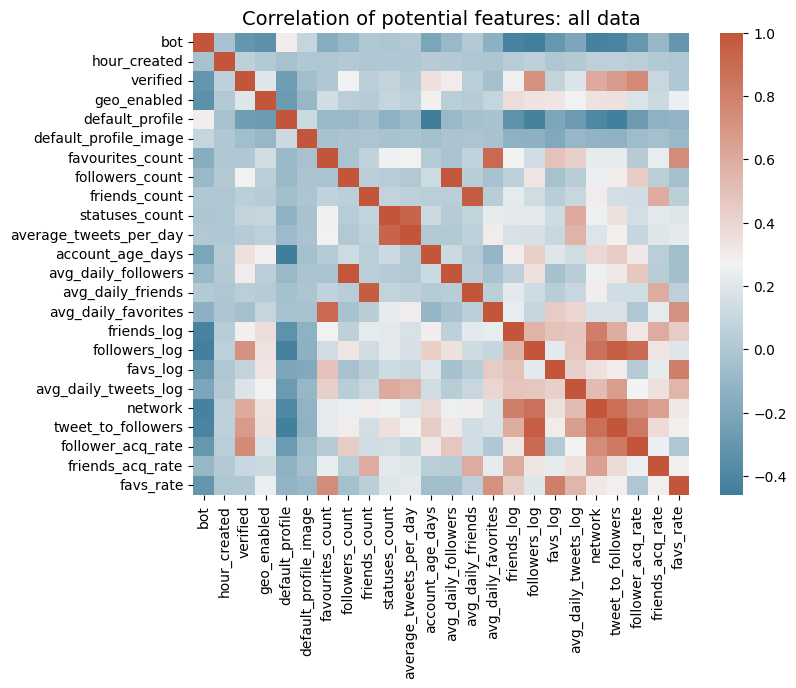

In [14]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[np.number])

# Affichage de la carte de chaleur pour les colonnes numériques
plt.figure(figsize=(8, 6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(numeric_df.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: all data', fontsize=14)


#### Bots vs Humans

In [15]:
# Séparer les bots et les humains
bots = df[df['bot'] == 1]
humans = df[df['bot'] == 0]

Text(0.5, 1.0, 'Correlation of potential features: bots only')

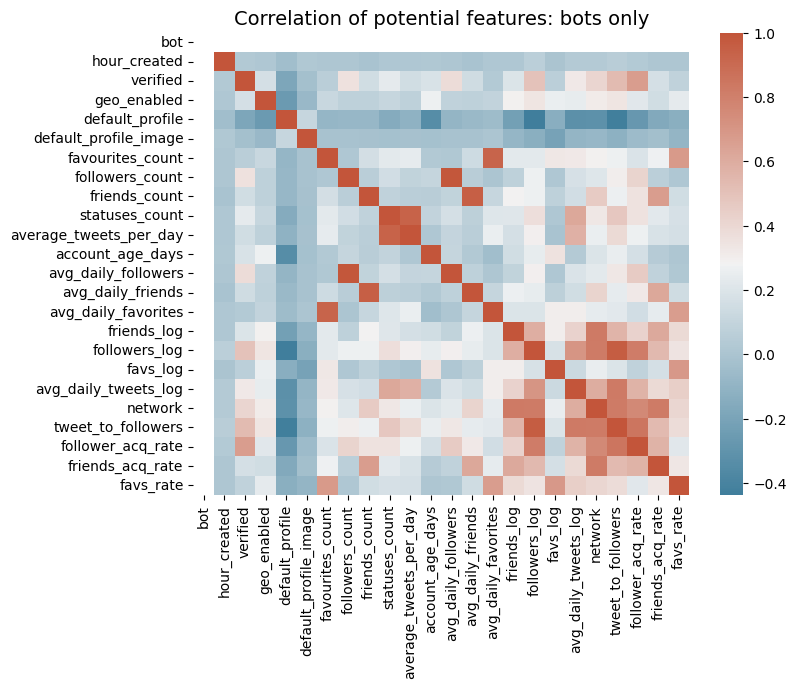

In [16]:
# Sélectionner uniquement les colonnes numériques pour les bots
numeric_bots = bots.select_dtypes(include=[np.number])

# Affichage de la carte de chaleur pour les bots
plt.figure(figsize=(8, 6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(numeric_bots.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: bots only', fontsize=14)

Text(0.5, 1.0, 'Correlation of potential features: humans only')

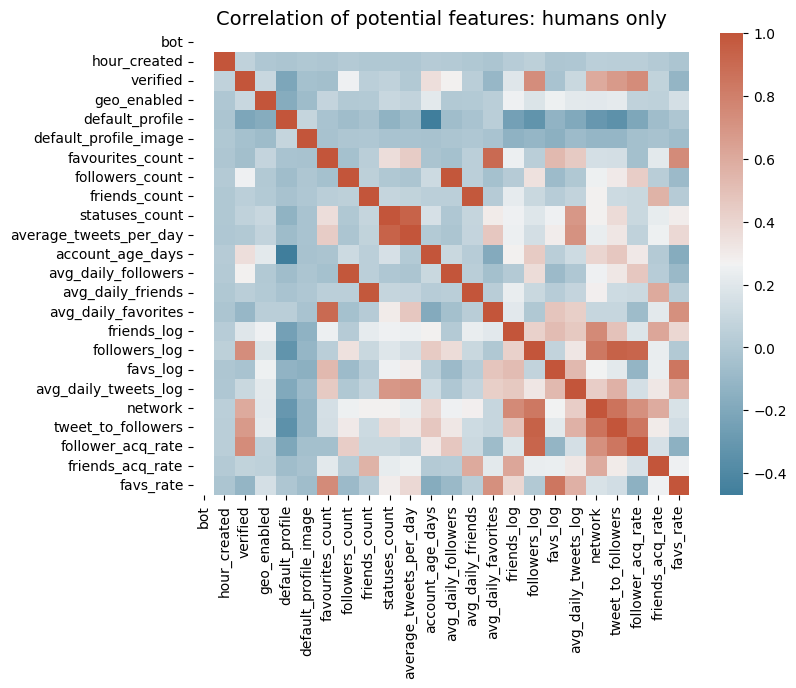

In [17]:
# Sélectionner uniquement les colonnes numériques pour les humains
numeric_humans = humans.select_dtypes(include=[np.number])

# Affichage de la carte de chaleur pour les humains
plt.figure(figsize=(8, 6), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(numeric_humans.corr(), cmap=cmap, annot=False)
plt.title('Correlation of potential features: humans only', fontsize=14)


### Distributions

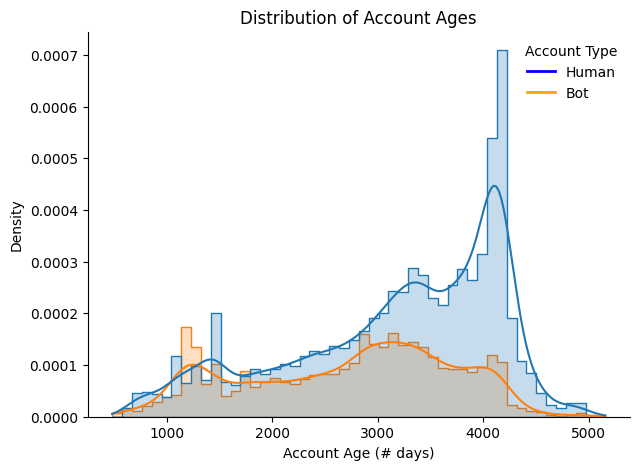

In [18]:
# Distribution des âges de comptes
plt.figure(figsize=(7, 5), dpi=100)
sns.histplot(x='account_age_days', data=df, hue='bot', alpha=0.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')]) 

plt.title('Distribution of Account Ages', fontsize=12)
plt.xlabel('Account Age (# days)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine()


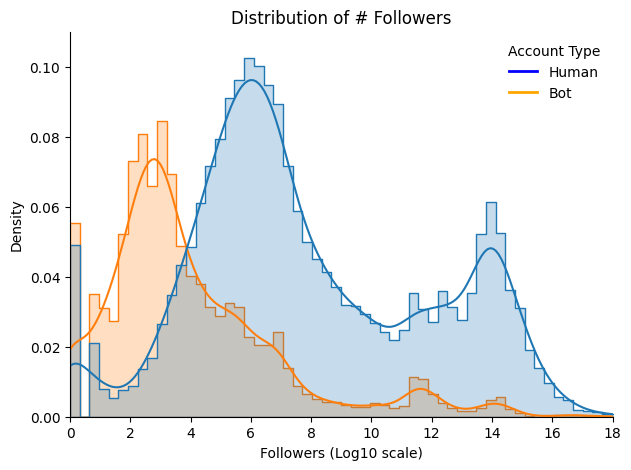

In [19]:
# Distribution des followers
plt.figure(figsize=(7, 5), dpi=100)
sns.histplot(x='followers_log', data=df, hue='bot', alpha=0.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  

plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.11)
sns.despine()


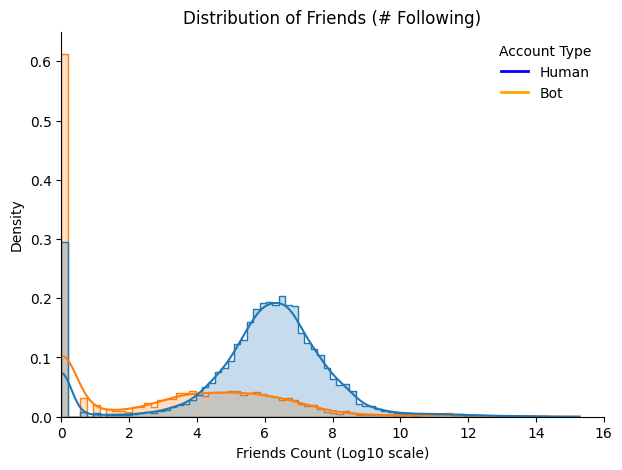

In [20]:
# Distribution des abonnés (following)
plt.figure(figsize=(7, 5), dpi=100)
sns.histplot(x='friends_log', data=df, hue='bot', alpha=0.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'), 
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')]) 

plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 16)
plt.ylim(0, 0.65)
sns.despine()


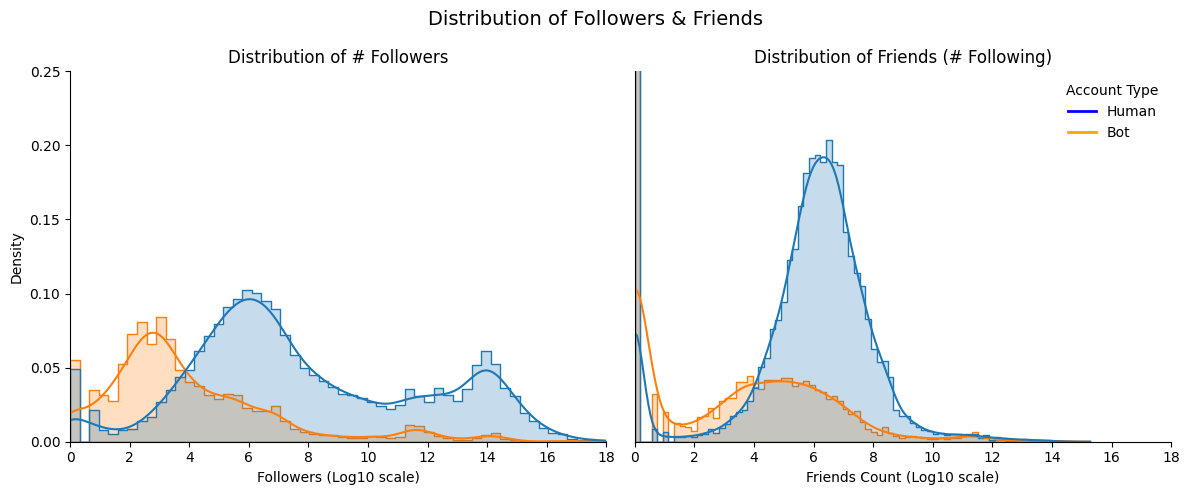

In [21]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Distribution of Followers & Friends', fontsize=14)

# Graphique des followers
plt.subplot(1, 2, 1)
sns.histplot(x='followers_log', data=df, hue='bot', alpha=0.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.title('Distribution of # Followers', fontsize=12)
plt.xlabel('Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine()

# Graphique des abonnés (following)
plt.subplot(1, 2, 2)
sns.histplot(x='friends_log', data=df, hue='bot', alpha=0.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.title('Distribution of Friends (# Following)', fontsize=12)
plt.xlabel('Friends Count (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])  # Retirer les ticks de l'axe y
plt.xlim(0, 18)
plt.ylim(0, 0.25)
sns.despine()

# Ajouter une légende manuelle après les graphiques
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'), 
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')]) 

# Afficher le graphique
plt.tight_layout()


#### *Taille du Réseau* 
Définie comme le produit du nombre d'amis et du nombre de followers, en échelle Log10.

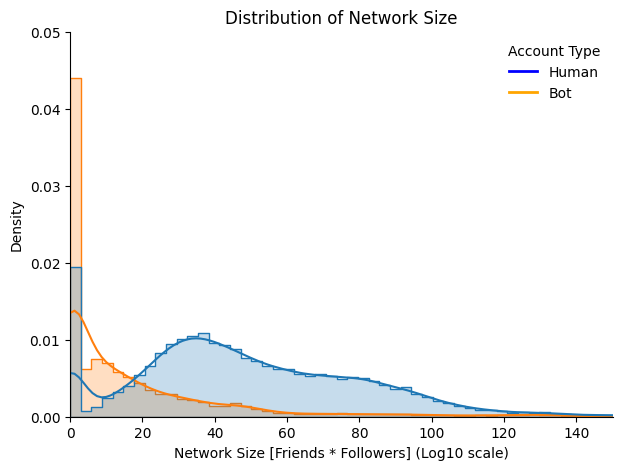

In [25]:
plt.figure(figsize=(7,5), dpi=100)

# Tracer le graphique sans légende automatique
sns.histplot(x='network', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

# Personnalisation des axes et du titre
plt.title('Distribution of Network Size', fontsize=12)
plt.xlabel('Network Size [Friends * Followers] (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 150)
plt.ylim(0, 0.05)

# Enlever les bords du graphique
sns.despine();


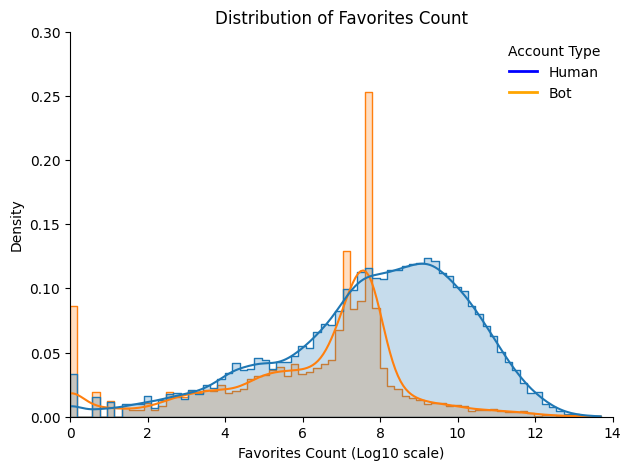

In [26]:
plt.figure(figsize=(7,5), dpi=100)

# Tracer le graphique sans légende automatique
sns.histplot(x='favs_log', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

# Personnalisation des axes et du titre
plt.title("Distribution of Favorites Count", fontsize=12)
plt.xlabel('Favorites Count (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 14)
plt.ylim(0, 0.3)

# Enlever les bords du graphique
sns.despine();


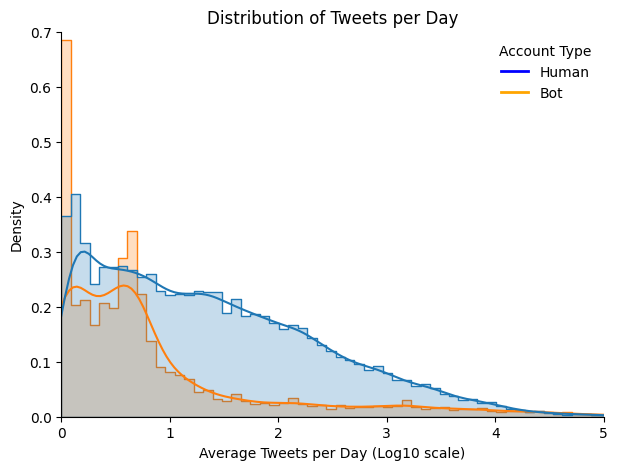

In [27]:
plt.figure(figsize=(7,5), dpi=100)

# Tracer le graphique sans légende automatique
sns.histplot(x='avg_daily_tweets_log', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

# Personnalisation des axes et du titre
plt.title("Distribution of Tweets per Day", fontsize=12)
plt.xlabel('Average Tweets per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 5)
plt.ylim(0, 0.7)

# Enlever les bords du graphique
sns.despine();


#### *Taux d'acquisition de followers*  
Peut être considéré comme le taux d'acquisition régulier de nouveaux followers par jour.


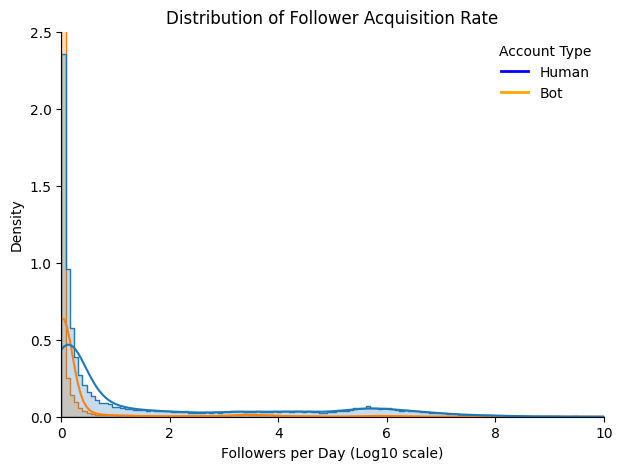

In [28]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='follower_acq_rate', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

plt.title("Distribution of Follower Acquisition Rate", fontsize=12)
plt.xlabel('Followers per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 10)
plt.ylim(0, 2.5)
sns.despine();


#### Taux d'acquisition d'amis

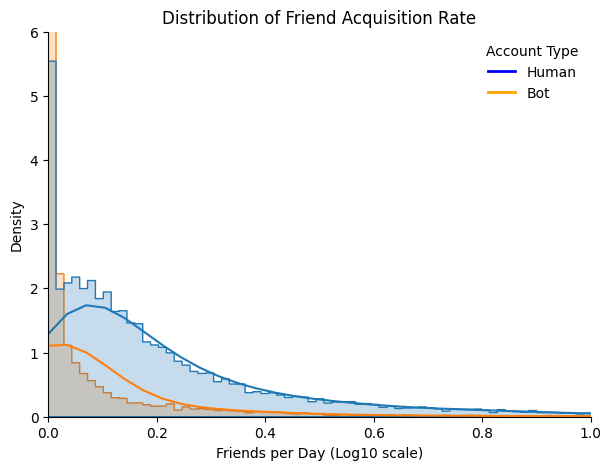

In [29]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='friends_acq_rate', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

plt.title("Distribution of Friend Acquisition Rate", fontsize=12)
plt.xlabel('Friends per Day (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 6)
sns.despine();


La **métrique "Tweets to Followers"** évalue l'impact des tweets d'un utilisateur en fonction de sa fréquence de publication et de son nombre de followers. Elle reflète la portée potentielle des tweets : plus un utilisateur tweete souvent et a de followers, plus cette métrique sera élevée.


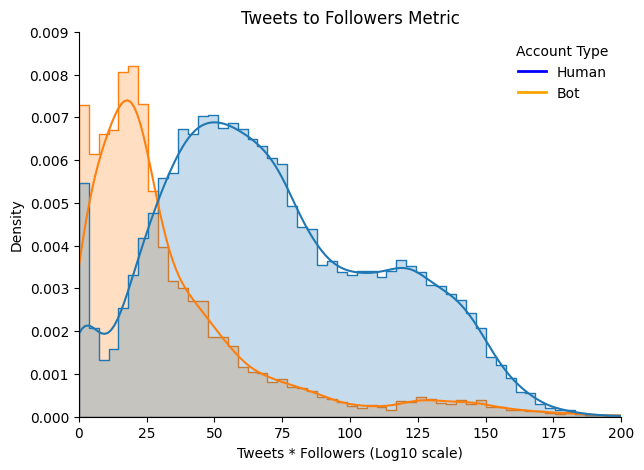

In [30]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='tweet_to_followers', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='upper right', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

plt.title("Tweets to Followers Metric", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 200)
plt.ylim(0, 0.009)
sns.despine();


#### Heure de création du compte
Cela analyse à quelle heure de la journée la plupart des comptes humains et bots sont créés. Cela peut aider à identifier des comportements inhabituels, comme des comptes de bots créés à des heures spécifiques.


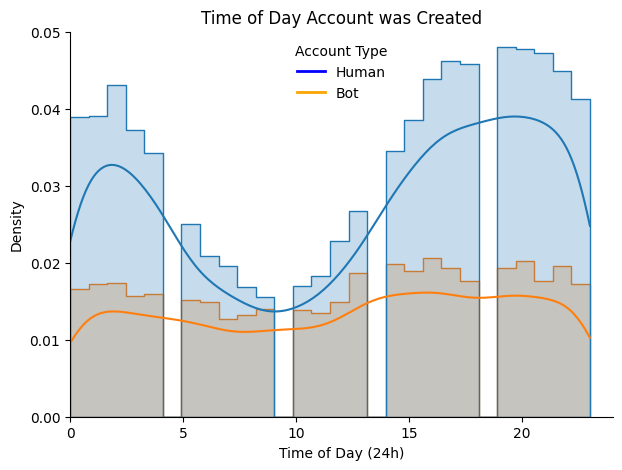

In [31]:
plt.figure(figsize=(7,5), dpi=100)
sns.histplot(x='hour_created', data=df, hue='bot', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

# Ajouter des légendes manuelles
plt.legend(title='Account Type', 
           labels=['Human', 'Bot'], 
           loc='best', 
           frameon=False, 
           handles=[plt.Line2D([0], [0], color='blue', lw=2, ls='-'),  # Human (bleu)
                    plt.Line2D([0], [0], color='orange', lw=2, ls='-')])  # Bot (orange)

plt.title("Time of Day Account was Created", fontsize=12)
plt.xlabel('Time of Day (24h)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xlim(0, 24)
plt.ylim(0, 0.05)
sns.despine();


#### Statut de Vérification

Le **statut de vérification** d'un compte peut être un indicateur important. Un compte peut être vérifié s'il est jugé d'intérêt public, comme ceux des personnalités publiques (musique, cinéma, politique, sport, etc.).

Le processus de vérification comprend une évaluation minutieuse des comptes dans ces domaines. Il est important de noter que, dans l'analyse précédente, on a observé une différence significative entre les comptes vérifiés et non vérifiés, en fonction du type de compte (bot ou humain).

Cependant, cette différence ne signifie pas nécessairement que les **bots** sont moins susceptibles d'être vérifiés. Cela pourrait être le résultat d'un **jeu de données déséquilibré**. Néanmoins, le **statut de vérification** pourrait jouer un rôle clé dans la construction d'un modèle de prédiction des bots.


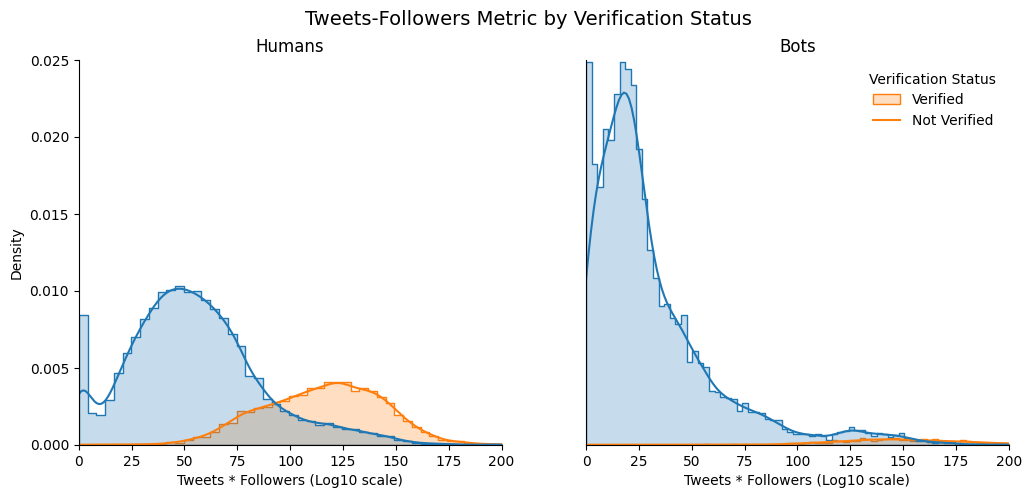

In [32]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Tweets-Followers Metric by Verification Status', fontsize=14)

# Graphique pour les humains
plt.subplot(1, 2, 1)
sns.histplot(x='tweet_to_followers', data=humans, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)

plt.title("Humans", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom=True, left=True)
plt.xlim(0, 200)
plt.ylim(0, 0.025)

# Graphique pour les bots
plt.subplot(1, 2, 2)
sns.histplot(x='tweet_to_followers', data=bots, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)

# Légende personnalisée
plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Tweets * Followers (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])

sns.despine()
plt.xlim(0, 200)
plt.ylim(0, 0.025);


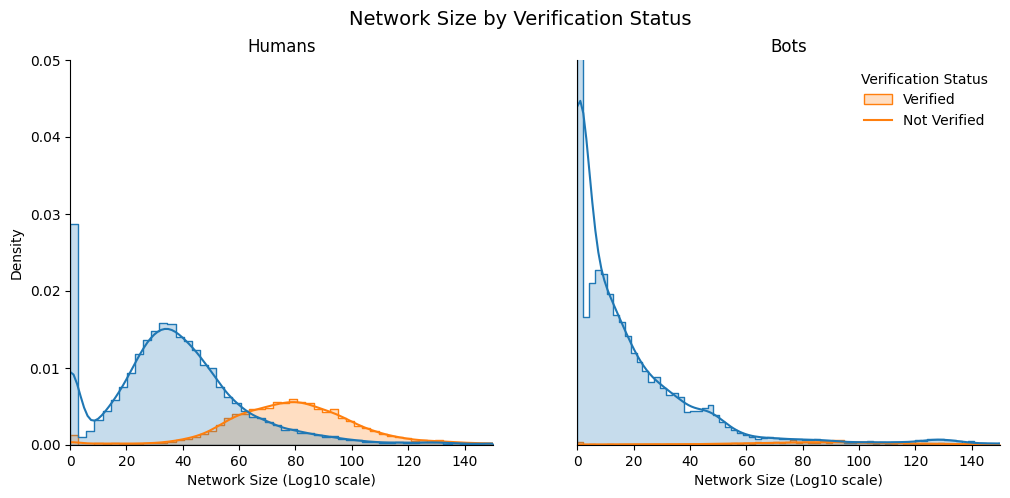

In [33]:
plt.figure(figsize=(12,5), dpi=100)
plt.suptitle('Network Size by Verification Status', fontsize=14)

# Graphique pour les humains
plt.subplot(1, 2, 1)
sns.histplot(x='network', data=humans, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=False)
plt.xlabel('Network Size (Friends * Followers)')
plt.title("Humans", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel('Density', fontsize=10)
sns.despine(bottom=True, left=True)
plt.xlim(0, 150)
plt.ylim(0, 0.05)

# Graphique pour les bots
plt.subplot(1, 2, 2)
sns.histplot(x='network', data=bots, hue='verified', alpha=.25, 
             kde=True, stat='density', common_bins=True, element='step', legend=True)
plt.xlabel('Network Size (Friends * Followers)')

# Légende personnalisée
plt.legend(title='Verification Status', loc='upper right', labels=['Verified', 'Not Verified'], frameon=False)
plt.title("Bots", fontsize=12)
plt.xlabel('Network Size (Log10 scale)', fontsize=10)
plt.ylabel("")
plt.yticks([])

sns.despine()
plt.xlim(0, 150)
plt.ylim(0, 0.05);
